In [1]:
# !unzip mmwave-data.zip

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import special as sp
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
from scipy import special as sp
import warnings
warnings.filterwarnings('ignore')

# Data Load

## Small Scale Fading Data 

In [3]:
def SSF_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def SSF_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9


######################
#### LOAD PATH AB ####
######################
SSF_pathAB_dB = pd.DataFrame()
SSF_pathAB_dB['AP1'], SSF_pathAB_dB['AP2'], SSF_pathAB_dB['AP3'],\
 SSF_pathAB_dB['AP4'], SSF_pathAB_dB['AP5'], SSF_pathAB_dB['AP6'],\
  SSF_pathAB_dB['AP7'], SSF_pathAB_dB['AP8'], SSF_pathAB_dB['AP9'] = SSF_mmdata_dB('AB')

SSF_pathAB_linear = pd.DataFrame()
SSF_pathAB_linear['AP1'], SSF_pathAB_linear['AP2'], SSF_pathAB_linear['AP3'],\
 SSF_pathAB_linear['AP4'], SSF_pathAB_linear['AP5'], SSF_pathAB_linear['AP6'],\
  SSF_pathAB_linear['AP7'], SSF_pathAB_linear['AP8'], SSF_pathAB_linear['AP9'] = SSF_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
SSF_pathBA_dB = pd.DataFrame()
SSF_pathBA_dB['AP1'], SSF_pathBA_dB['AP2'], SSF_pathBA_dB['AP3'],\
 SSF_pathBA_dB['AP4'], SSF_pathBA_dB['AP5'], SSF_pathBA_dB['AP6'],\
  SSF_pathBA_dB['AP7'], SSF_pathBA_dB['AP8'], SSF_pathBA_dB['AP9'] = SSF_mmdata_dB('BA')

SSF_pathBA_linear = pd.DataFrame()
SSF_pathBA_linear['AP1'], SSF_pathBA_linear['AP2'], SSF_pathBA_linear['AP3'],\
 SSF_pathBA_linear['AP4'], SSF_pathBA_linear['AP5'], SSF_pathBA_linear['AP6'],\
  SSF_pathBA_linear['AP7'], SSF_pathBA_linear['AP8'], SSF_pathBA_linear['AP9'] = SSF_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(SSF_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(SSF_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(SSF_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(SSF_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-0.696300,-0.706977,-0.950157,-0.649444,-0.671172,-1.023778,-0.975409,-0.890574,-1.067207
std,3.827021,3.843941,4.345763,3.608783,3.657521,4.609185,4.428430,4.217900,4.628232
min,-28.257000,-26.160000,-30.613000,-26.990000,-29.916000,-29.998000,-27.744000,-24.949000,-26.882000
25%,-2.003200,-2.086100,-2.829525,-1.817875,-1.925500,-3.061450,-3.032250,-2.724975,-3.256600
50%,0.017756,-0.086271,-0.148310,-0.047697,-0.012861,-0.149310,-0.141100,-0.180765,-0.253520
75%,1.553000,1.488500,1.844975,1.316550,1.431450,1.974400,1.982550,1.821300,2.012050
max,8.209900,9.598300,9.200100,10.698000,9.334600,8.803300,9.140200,9.140100,9.516400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,0.998078,0.999170,0.994459,0.996652,0.996119,0.998034,0.996456,0.996790,0.996149
std,0.346952,0.361394,0.406651,0.340052,0.342458,0.428794,0.417400,0.402380,0.439500
min,0.038648,0.049204,0.029467,0.044717,0.031928,0.031630,0.041001,0.056568,0.045280
25%,0.794040,0.786490,0.721980,0.811160,0.801170,0.702955,0.705320,0.730723,0.687333
50%,1.002000,0.990120,0.983070,0.994525,0.998520,0.982960,0.983890,0.979400,0.971230
75%,1.195800,1.186900,1.236625,1.163675,1.179200,1.255200,1.256400,1.233275,1.260675
max,2.573300,3.019400,2.884100,3.426900,2.929100,2.755300,2.864200,2.864200,2.991000


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.141164,-1.154185,-1.201912,-1.197784,-1.120310,-1.244764,-1.132814,-1.108337,-1.219527
std,4.811502,4.821488,4.949272,4.950949,4.758712,5.050291,4.790806,4.782434,5.034982
min,-27.320000,-27.572000,-29.529000,-28.736000,-30.499000,-31.529000,-26.868000,-28.713000,-29.627000
25%,-3.625500,-3.761550,-3.749250,-3.664900,-3.414300,-3.908400,-3.468750,-3.467175,-3.835200
50%,-0.280440,-0.366350,-0.327530,-0.265050,-0.282530,-0.364120,-0.316615,-0.214105,-0.305010
75%,2.210025,2.240700,2.276500,2.249450,2.210200,2.357300,2.133950,2.137500,2.370900
max,10.524000,10.389000,10.315000,9.950700,9.385600,9.530000,10.148000,9.653300,10.109000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,0.997566,0.998390,0.998292,0.996041,0.994971,0.997650,0.996580,0.998705,0.999811
std,0.457868,0.468088,0.473801,0.460772,0.442697,0.477986,0.454135,0.453083,0.476423
min,0.043050,0.041821,0.033383,0.036578,0.029857,0.026520,0.045353,0.036673,0.033011
25%,0.658760,0.648515,0.649440,0.655775,0.674970,0.637650,0.670752,0.670878,0.643050
50%,0.968230,0.958700,0.962990,0.969950,0.968000,0.958950,0.964205,0.975650,0.965490
75%,1.289700,1.294300,1.299650,1.295600,1.289800,1.311800,1.278500,1.279025,1.313800
max,3.358700,3.307100,3.279200,3.144400,2.946300,2.995700,3.216800,3.038600,3.202300


## Composite (Small + Large) Scale Fading Data

In [4]:
def composite_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def composite_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
composite_pathAB_dB = pd.DataFrame()
composite_pathAB_dB['AP1'], composite_pathAB_dB['AP2'], composite_pathAB_dB['AP3'],\
 composite_pathAB_dB['AP4'], composite_pathAB_dB['AP5'], composite_pathAB_dB['AP6'],\
  composite_pathAB_dB['AP7'], composite_pathAB_dB['AP8'], composite_pathAB_dB['AP9'] = composite_mmdata_dB('AB')

composite_pathAB_linear = pd.DataFrame()
composite_pathAB_linear['AP1'], composite_pathAB_linear['AP2'], composite_pathAB_linear['AP3'],\
 composite_pathAB_linear['AP4'], composite_pathAB_linear['AP5'], composite_pathAB_linear['AP6'],\
  composite_pathAB_linear['AP7'], composite_pathAB_linear['AP8'], composite_pathAB_linear['AP9'] = composite_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
composite_pathBA_dB = pd.DataFrame()
composite_pathBA_dB['AP1'], composite_pathBA_dB['AP2'], composite_pathBA_dB['AP3'],\
 composite_pathBA_dB['AP4'], composite_pathBA_dB['AP5'], composite_pathBA_dB['AP6'],\
  composite_pathBA_dB['AP7'], composite_pathBA_dB['AP8'], composite_pathBA_dB['AP9'] = composite_mmdata_dB('BA')

composite_pathBA_linear = pd.DataFrame()
composite_pathBA_linear['AP1'], composite_pathBA_linear['AP2'], composite_pathBA_linear['AP3'],\
 composite_pathBA_linear['AP4'], composite_pathBA_linear['AP5'], composite_pathBA_linear['AP6'],\
  composite_pathBA_linear['AP7'], composite_pathBA_linear['AP8'], composite_pathBA_linear['AP9'] = composite_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(composite_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(composite_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(composite_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(composite_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-1.331243,-2.026816,-2.148211,-1.354591,-1.358023,-1.965932,-1.867219,-2.455355,-2.377686
std,5.555703,5.295770,5.622319,5.555328,5.270987,6.592554,5.370040,4.979277,5.386154
min,-34.977000,-35.591000,-37.205000,-33.143000,-34.196000,-36.296000,-32.348000,-32.857000,-32.103000
25%,-4.141100,-4.725900,-5.285100,-4.408050,-4.099150,-5.727400,-4.738550,-4.891600,-5.360025
50%,-0.597460,-1.021800,-1.318900,-0.049510,-0.654870,-1.528100,-0.982990,-1.590450,-1.507750
75%,2.620200,1.610700,1.786325,2.748350,1.862300,2.231150,1.945700,0.924527,1.539700
max,12.562000,9.626500,10.084000,9.553500,11.060000,13.356000,11.339000,9.054900,8.569400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,1.016877,0.921460,0.932225,1.008525,1.005849,1.035511,0.946677,0.863832,0.893894
std,0.547200,0.453448,0.513528,0.503199,0.564291,0.775473,0.486083,0.408087,0.462476
min,0.017830,0.016613,0.013796,0.022022,0.019507,0.015317,0.024133,0.022760,0.024821
25%,0.620790,0.580370,0.544185,0.602000,0.623795,0.517165,0.579525,0.569400,0.539513
50%,0.933530,0.889020,0.859125,0.994320,0.927380,0.838670,0.893000,0.832675,0.840645
75%,1.352150,1.203700,1.228300,1.372175,1.239150,1.292900,1.251050,1.112300,1.193975
max,4.247100,3.029200,3.193200,3.003800,3.572700,4.653600,3.689400,2.836300,2.682100


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.478477,-1.796911,-1.697986,-1.304056,-1.382989,-1.228730,-1.269627,-1.546466,-1.263962
std,5.612589,5.461735,5.331014,5.664596,5.709885,5.531827,5.590528,6.177197,5.595894
min,-29.275000,-30.195000,-29.306000,-31.022000,-35.014000,-30.264000,-29.162000,-32.034000,-29.974000
25%,-4.688175,-4.909150,-4.600750,-4.491600,-4.574200,-4.335100,-4.386750,-5.096475,-4.449900
50%,-0.726485,-1.062800,-0.846180,-0.413770,-0.738970,-0.424370,-0.462455,-0.927085,-0.411740
75%,2.475750,2.116600,2.084900,2.743400,2.576700,2.746100,2.654150,2.612550,2.782800
max,13.313000,12.184000,11.274000,13.101000,11.902000,10.764000,12.810000,14.148000,13.559000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,1.010464,0.963914,0.964883,1.029932,1.026995,1.030575,1.030587,1.047470,1.031002
std,0.577506,0.527819,0.503657,0.570421,0.595472,0.556338,0.572540,0.705591,0.566503
min,0.034377,0.030919,0.034252,0.028112,0.017754,0.030675,0.034824,0.025021,0.031717
25%,0.582895,0.568255,0.588795,0.596235,0.590590,0.607080,0.603480,0.556130,0.599110
50%,0.919760,0.884830,0.907180,0.953480,0.918440,0.952320,0.948150,0.898760,0.953700
75%,1.329775,1.275950,1.271300,1.371450,1.345300,1.371800,1.357425,1.350900,1.377700
max,4.630500,4.066500,3.661900,4.518900,3.936400,3.453000,4.370200,5.098000,4.763800


# Auxiliary Methods

In [5]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set") 
        
def KappaMuPDF(r, kappa, mu, omega):
  '''
  kappa-mu pdf.
  '''
  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /(np.sqrt(omega) * (kappa**((mu-1)/2)) * np.exp(mu * kappa))
  B = (r / np.sqrt(omega))**(mu)
  C = np.exp(-mu*(1+kappa) * (r/np.sqrt(omega))**2)
  D = sp.iv(mu-1, 2*mu * np.sqrt(kappa * (1+kappa)) * (r/np.sqrt(omega)))

  pdf = A * B * C * D
  return pdf

def shadowedKappaMuPDF(r, kappa, mu, omega, md):
  '''
  shadowed kappa-mu pdf (type 1).
  '''
  A = 2 * r**((2*mu) -1) / omega**(mu)
  B = (mu**mu * md**md * (1+kappa)**mu) / (sp.gamma(mu) * ((mu*kappa)+md)**md)
  C = np.exp((- mu * (1+kappa) * r**2) / omega)
  D = (mu**2) * kappa * (1+kappa) * (r**2)
  E = ((mu*kappa)+md) * omega
  F = sp.hyp1f1(md, mu, D / E)

  pdf = A * B * C * F
  return pdf

def shadowedKappaMuPDF_t2(r, kappa, mu, r_hat, ms):
  '''
  shadowed kappa-mu pdf (type 2).
  '''
  A = 2 * ( ( ms - 1 ) ** ( ms ) ) * ( r ** ( ( 2 * mu ) - 1 ) )  * ( r_hat ** ( 2 * ms ) ) * ( ( 1 + kappa ) ** mu) * ( mu ** mu )
  B = sp.beta(ms, mu ) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( ms - 1 + (kappa * mu) ) ) ) ** ( mu + ms ) )
  C = (ms+mu)/2
  D = (1+ms+mu)/2
  E = 4 * (mu**2) * kappa * (1 + kappa) * (r**2) * (r_hat**2)
  F = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( ms - 1 + (kappa * mu) ) ) )**2
  G = sp.hyp2f1( C, D, mu, E / F )

  pdf = (A/B)*G
  return pdf

def shadowedKappaMuPDF_t3(r, kappa, mu, r_hat, mt):
  '''
  shadowed kappa-mu pdf (type 3).
  '''
  A = 2 * ( ( 1 + kappa ) ** mu) * ( mu ** mu ) * math.exp( -kappa * mu ) * ( ( (mt - 1) * ( r_hat ** 2 ) )**( mt ) ) * ( r ** ( ( 2 * mu ) - 1 ) )
  B = sp.beta(mt, mu) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( mt - 1 ) ) )**( mu + mt ) )
  C = (mt+mu)
  D = ( mu ** 2 ) * kappa * ( 1 + kappa ) * ( r**2)
  E = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( mt - 1 ) ) )
  F = sp.hyp1f1(C, mu, D/E )

  pdf = (A/B)*F
  return pdf

def kldiv(pVec1, pVec2):
  '''
  Kullback-Leibler divergence.
  '''
  KL = np.sum(pVec1*(np.log2(pVec1)-np.log2(pVec2)))
  return KL

def RAD(kldiv1, kldiv2):
  '''
  Resistor-Average Distance.
  '''
  RAD = 1/(1/kldiv1+1/kldiv2)
  return RAD


def fitness(X, Y, fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = KappaMuPDF(X, kappa, mu, omega)
    n = len(Y)
    cost = 1/n * sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = KappaMuPDF(X, kappa, mu, omega)/np.sum(KappaMuPDF(X, kappa, mu, omega))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost

def getDensityEstimationSamples(linear_data, nExtractedSamples, path, nAP):
  '''
  Extracted KDE uniformly spaced samples from the data.
  '''
  Xdata = np.linspace(linear_data.min(), linear_data.max(), nExtractedSamples).reshape(-1, 1)
  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(linear_data.values.reshape(-1, 1))
  
  logkde = kde.score_samples(Xdata)
  Ydata = np.exp(logkde).reshape(-1,1)
  plt.figure(figsize=(10,7))
  plt.scatter(20*np.log10(Xdata), Ydata, c='magenta')
  plt.title(f'Path {path} | RX: {nAP}')
  plt.ylabel('Density')
  plt.xlabel('Small Scale Fading (dB)')
  plt.grid()
  plt.show()
  return Xdata, Ydata

def printSummary(path, nAP, fitnessType):
  print('='*30+'\n'+'Genetic Algorithm Fitting\nFitness Type: {}\nPath: {}\nRX: {}\n'.format(fitnessType, path, nAP))

def computeAIC(data, n, K, mle_sku, ga_sku_mse, ga_sku_rad):

    # AIC MLE - SHADOWED KAPPA MU
    sum = np.sum(np.log(shadowedKappaMuPDF(data, mle_sku[0], mle_sku[1], mle_sku[2], mle_sku[3]).astype(float)))
    AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: MSE
    sum = np.sum(np.log(shadowedKappaMuPDF(data, ga_sku_mse[0], ga_sku_mse[1], ga_sku_mse[2], ga_sku_mse[3])))
    AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM SHADOWED KAPPA MU - FITNESS: RAD
    sum = np.sum(np.log(shadowedKappaMuPDF(data, ga_sku_rad[0], ga_sku_rad[1], ga_sku_rad[2], ga_sku_rad[3])))
    AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


    rads = {'Methods':['MLE - Shad. KappaMu T1', 'GA - Shad. KappaMu T1 (Fitness = MSE)',\
                       'GA - Shad. KappaMu T1 (Fitness = RAD)'],
        'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
    df = pd.DataFrame(rads)
    display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))
    
    return df

def plotResults(Xdata, Ydata, sku_pdf, ga_sku_mse, ga_sku_rad, path, nAP):
    
    if not os.path.exists('plots_skut1'):
        os.makedirs('plots_skut1')
    
    plt.figure(figsize=((10,7)))
    plt.scatter(20*np.log10(Xdata), Ydata, c='black')
    plt.plot(20*np.log10(Xdata), sku_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
    plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, ga_sku_mse[0], ga_sku_mse[1], ga_sku_mse[2], ga_sku_mse[3]), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
    plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF(Xdata, ga_sku_rad[0], ga_sku_rad[1], ga_sku_rad[2], ga_sku_rad[3]), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
    plt.title(f'Path {path} | RX: {nAP}')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'Composite Scale Fading (dB)')
    plt.ylabel('Density')
    plt.savefig('plots_skut1/sku-t1_path{}_ap{}.pdf'.format(path, nAP), dpi=150)
    plt.show()

    plt.figure(figsize=((10,7)))
    plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
    plt.plot(20*np.log10(Xdata), 20*np.log10(sku_pdf), c='blue', label=r'Shad. $\kappa$-$\mu$ MLE')
    plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, ga_sku_mse[0], ga_sku_mse[1], ga_sku_mse[2], ga_sku_mse[3])), label='Shad. $\kappa$-$\mu$ GA (MSE)', c='red')
    plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF(Xdata, ga_sku_rad[0], ga_sku_rad[1], ga_sku_rad[2], ga_sku_rad[3])), label='Shad. $\kappa$-$\mu$ GA (RAD)', c='green')
    plt.title(f'Path {path} | RX: {nAP}')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'Composite Scale Fading (dB)')
    plt.ylabel('Log Density')
    plt.savefig('plots_skut1/sku-t1_path{}_ap{} - log.pdf'.format(path, nAP), dpi=150)
    plt.show()

In [6]:
def fitness_sku(X, Y, fitnessType, kappa, mu, omega, md):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Shadowed Kappa Mu Type 1)
  '''
  if fitnessType == 'MSE':
    y_pred = shadowedKappaMuPDF(X, kappa, mu, omega, md)
    n = len(Y)
    sum = []
    for val in (Y-y_pred):
      sum.append(val**2)
    sum = np.sum(sum)
    cost = 1/n * sum
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = shadowedKappaMuPDF(X, kappa, mu, omega, md)/np.sum(shadowedKappaMuPDF(X, kappa, mu, omega, md))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_sku(X, Y, threshold, firstFlag=True):
  '''
  Genetic Algorithm incorporating Shadowed Kappa Mu Type 1 in the Fitness Function
  It fits kappa, mu, omega, md
  '''
  if firstFlag:
        tic()
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.01, 11), # kappa
                        random.uniform(0.01, 3.0), # mu
                        random.uniform(0.01, 3.0), # r_hat^2
                        random.uniform(0.01, 20.0))) # md

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []
    for s in solutions:
      rankedSolutions.append( (fitness_sku(X, Y, fitnessType, s[0],s[1],s[2],s[3]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}')
    # print(f'Md: {rankedSolutions[0][1][3]}\n')

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Check if it is good enough according to a satisfactory threshold:
    if bestCriteria > threshold:
      print('Satisfactory Threshold reached!')  
      toc()
      print('\nBest Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nOmega: {}\nMd: {}'.format(bestParams[0],bestParams[1],bestParams[2],bestParams[3]))
      return bestParams[0],bestParams[1],bestParams[2],bestParams[3]
    
    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 
    elements_md = [] 
    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])
      elements_md.append(s[1][3])

    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%
      e4 = random.choice(elements_md) * random.uniform(0.975,1.025) # Mutation of 5%
      
      newGen.append((e1,e2,e3,e4))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('Max number of generations reached! (Possible bad initialization)\nRestarting...\n')
      b0, b1, b2, b3 = geneticAlgorithm_sku(X, Y, threshold, False)
        
      return b0, b1, b2, b3

# Composite Fading Fitting (PARAMETERS)

In [7]:
### PARAMETERS
nMaxGen = 200
nPopulation = 1000
nExtractedSamples = 81

## Shadowed $\kappa$-$\mu$ (type 1) - Path: AB

In [8]:
path = 'AB'

### AP 1

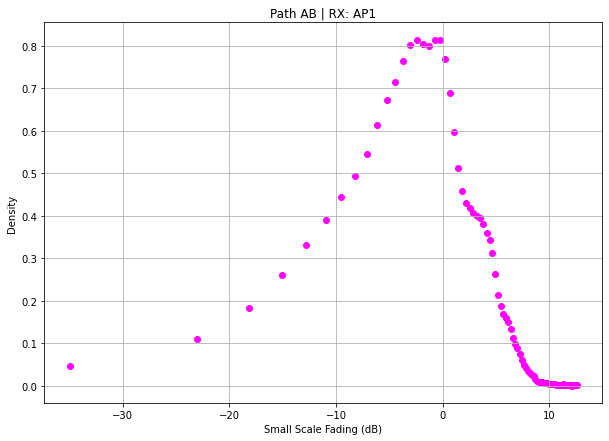

In [9]:
nAP = 'AP1'
estParameters_pathAB_ap1 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [10]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 1035)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 235.8)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 20.32603120803833 seconds.

Best Fitness: 1035.1294546639836
Best Gen: 93
Kappa: 1.0097652959617798
Mu: 1.147820184177197
Omega: 1.3812727962111386
Md: 0.44523109133500566
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 29.13477373123169 seconds.

Best Fitness: 235.80087202527073
Best Gen: 177
Kappa: 0.6238728143802562
Mu: 1.0320021818948069
Omega: 1.3327133268703621
Md: 0.4898712878348037


(1035, 236)

#### Estimated Parameters

In [11]:
mle_sku_t1_pathAB_ap1 = [1.0124, 1.1497, 1.3829, 0.44353]

estParameters_pathAB_ap1['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathAB_ap1
estParameters_pathAB_ap1['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathAB_ap1['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathAB_ap1 = estParameters_pathAB_ap1.set_index(index)
estParameters_pathAB_ap1

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,1.01240,1.009765,0.623873
mu,1.14970,1.147820,1.032002
omega,1.38290,1.381273,1.332713
md,0.44353,0.445231,0.489871


#### Plots

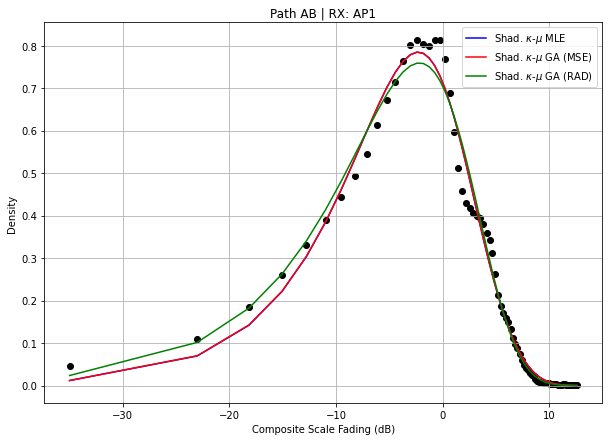

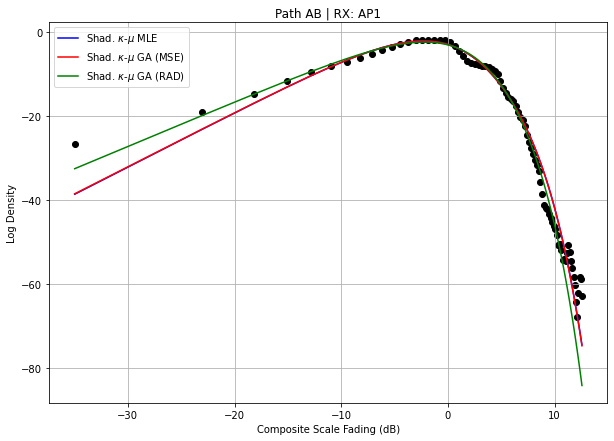

In [12]:
sku_t1_AB_ap1_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap1[0], mle_sku_t1_pathAB_ap1[1], mle_sku_t1_pathAB_ap1[2], mle_sku_t1_pathAB_ap1[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_AB_ap1_pdf,\
     estParameters_pathAB_ap1['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathAB_ap1['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [13]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap1 = computeAIC(data, n, K,\
                            mle_sku_t1_pathAB_ap1,\
                            estParameters_pathAB_ap1['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathAB_ap1['GA: Shad. KappaMu T1 - RAD'])

Path: AB
RX: AP1


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),31906.997624
1,GA - Shad. KappaMu T1 (Fitness = MSE),31972.122502
2,MLE - Shad. KappaMu T1,31975.554556


### AP 2

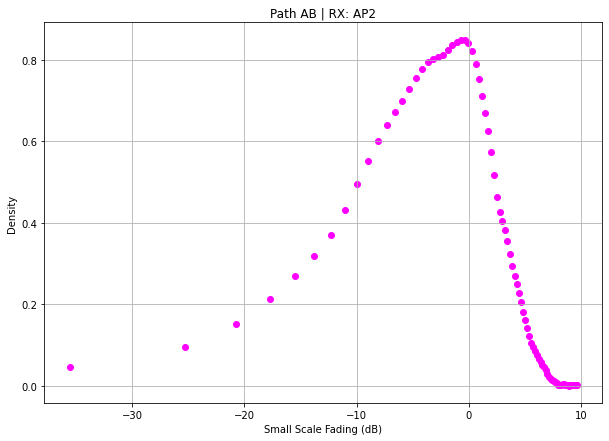

In [14]:
nAP = 'AP2'
estParameters_pathAB_ap2 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [15]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 3263)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 1068)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 14.454004287719727 seconds.

Best Fitness: 3264.4854958794413
Best Gen: 67
Kappa: 1.822196388976266
Mu: 0.9521654120309355
Omega: 1.0446386926354088
Md: 1.8817649433834516
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP2

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 31.51630449295044 seconds.

Best Fitness: 1104.9916718586092
Best Gen: 5
Kappa: 4.6920811527586
Mu: 0.9258757643361946
Omega: 1.0595548474674188
Md: 1.2909849961207447


#### Estimated Parameters

In [16]:
mle_sku_t1_pathAB_ap2 = [2.4447, 0.94293, 1.0470, 1.5968]

estParameters_pathAB_ap2['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathAB_ap2
estParameters_pathAB_ap2['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathAB_ap2['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathAB_ap2 = estParameters_pathAB_ap2.set_index(index)
estParameters_pathAB_ap2

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,2.44470,1.822196,4.692081
mu,0.94293,0.952165,0.925876
omega,1.04700,1.044639,1.059555
md,1.59680,1.881765,1.290985


#### Plots

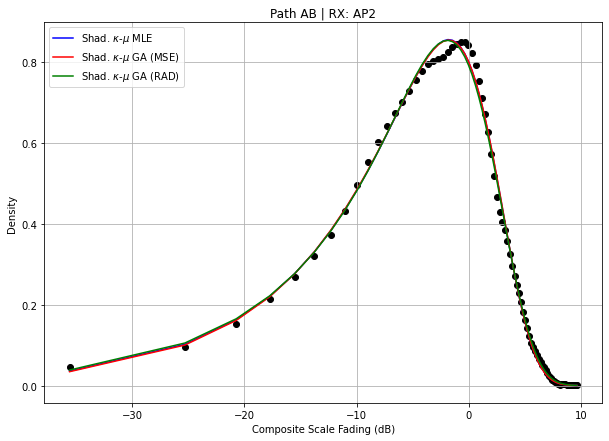

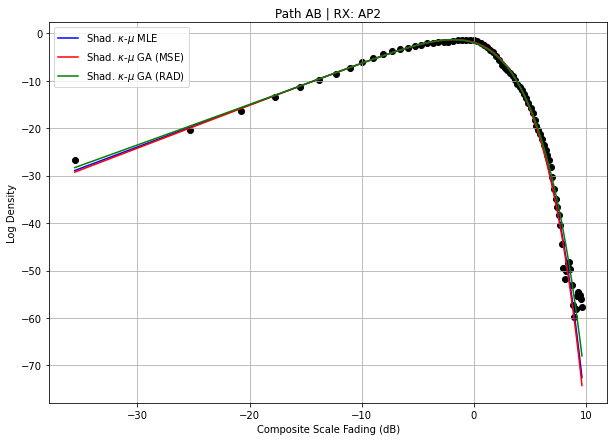

In [17]:
sku_t1_AB_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap2[0], mle_sku_t1_pathAB_ap2[1], mle_sku_t1_pathAB_ap2[2], mle_sku_t1_pathAB_ap2[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_AB_ap2_pdf,\
     estParameters_pathAB_ap2['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathAB_ap2['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [18]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap2 = computeAIC(data, n, K,\
                            mle_sku_t1_pathAB_ap2,\
                            estParameters_pathAB_ap2['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathAB_ap2['GA: Shad. KappaMu T1 - RAD'])

Path: AB
RX: AP2


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),20804.686381
1,MLE - Shad. KappaMu T1,20806.212984
2,GA - Shad. KappaMu T1 (Fitness = MSE),20809.906439


### AP 3

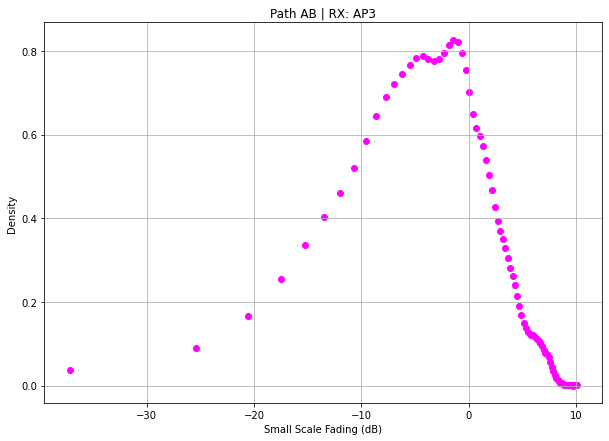

In [19]:
nAP = 'AP3'
estParameters_pathAB_ap3 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [20]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 3056)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 195)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP3

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 75.53063941001892 seconds.

Best Fitness: 3056.0439703303396
Best Gen: 177
Kappa: 0.5189410405781162
Mu: 1.009056067305104
Omega: 1.1796114264124538
Md: 0.22457218999973516
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 1.4504952430725098 seconds.

Best Fitness: 214.69418670034023
Best Gen: 6
Kappa: 0.597705363484003
Mu: 0.9774817557447462
Omega: 1.1504449978935438
Md: 0.4160618551433096


#### Estimated Parameters

In [21]:
mle_sku_t1_pathAB_ap3 = [0.51026, 1.0093, 1.1791, 0.22022]

estParameters_pathAB_ap3['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathAB_ap3
estParameters_pathAB_ap3['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathAB_ap3['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathAB_ap3 = estParameters_pathAB_ap3.set_index(index)
estParameters_pathAB_ap3

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,0.51026,0.518941,0.597705
mu,1.00930,1.009056,0.977482
omega,1.17910,1.179611,1.150445
md,0.22022,0.224572,0.416062


#### Plots

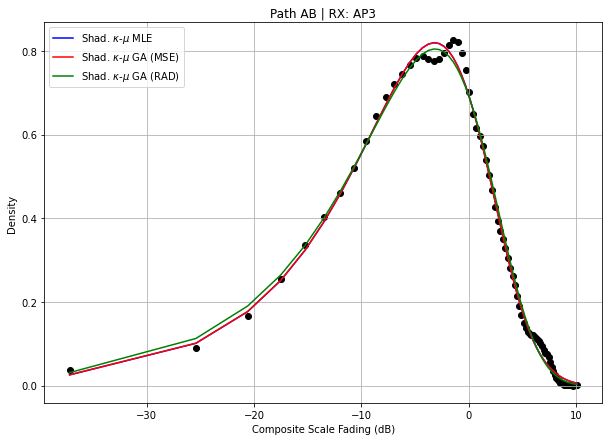

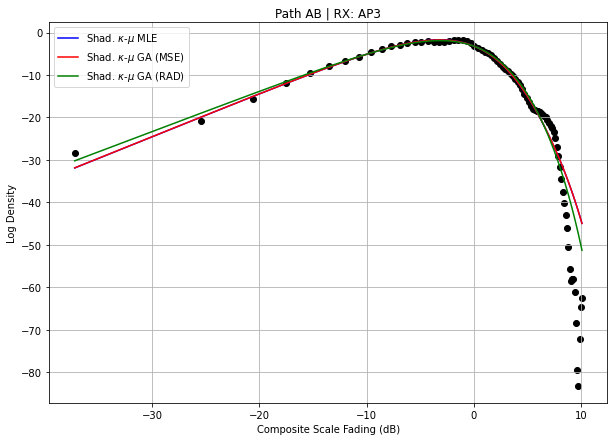

In [22]:
sku_t1_AB_ap3_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap3[0], mle_sku_t1_pathAB_ap3[1], mle_sku_t1_pathAB_ap3[2], mle_sku_t1_pathAB_ap3[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_AB_ap3_pdf,\
     estParameters_pathAB_ap3['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathAB_ap3['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [23]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap3 = computeAIC(data, n, K,\
                            mle_sku_t1_pathAB_ap3,\
                            estParameters_pathAB_ap3['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathAB_ap3['GA: Shad. KappaMu T1 - RAD'])

Path: AB
RX: AP3


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),28825.099294
1,GA - Shad. KappaMu T1 (Fitness = MSE),28921.199410
2,MLE - Shad. KappaMu T1,28922.350402


### AP 4

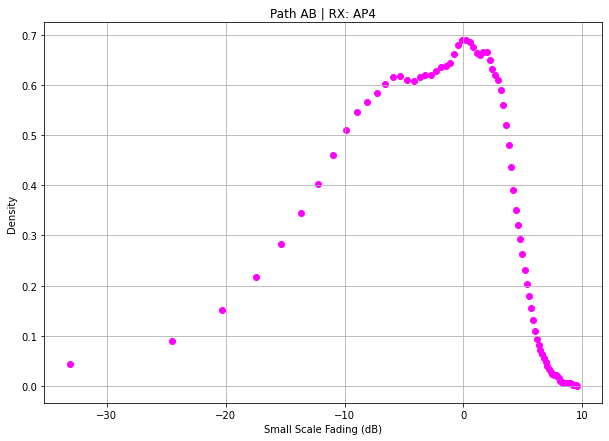

In [24]:
nAP = 'AP4'
estParameters_pathAB_ap4 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [25]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 569)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 196)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 2.1188011169433594 seconds.

Best Fitness: 569.123356448074
Best Gen: 9
Kappa: 1.2103133614236625
Mu: 0.8029777257131493
Omega: 1.3430057470045067
Md: 18.769516169420385
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 29.781105041503906 seconds.

Best Fitness: 196.0141598175706
Best Gen: 185
Kappa: 1.2764926102550083
Mu: 0.8421927846913206
Omega: 1.2752401318619786
Md: 11.170457568029367


#### Estimated Parameters

In [26]:
mle_sku_t1_pathAB_ap4 = [1.4423, 0.79539, 1.3368, 5]

estParameters_pathAB_ap4['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathAB_ap4
estParameters_pathAB_ap4['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathAB_ap4['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathAB_ap4 = estParameters_pathAB_ap4.set_index(index)
estParameters_pathAB_ap4

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,1.44230,1.210313,1.276493
mu,0.79539,0.802978,0.842193
omega,1.33680,1.343006,1.275240
md,5.00000,18.769516,11.170458


#### Plots

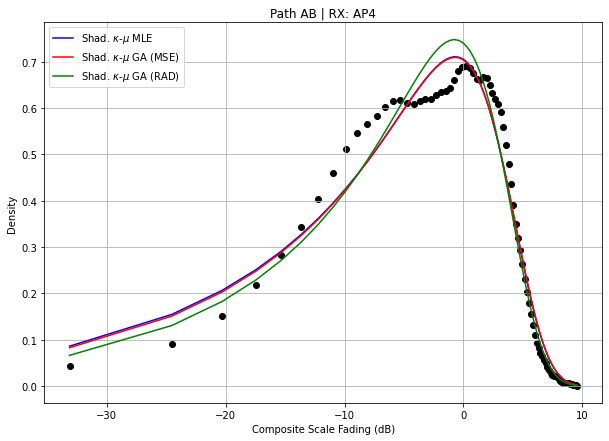

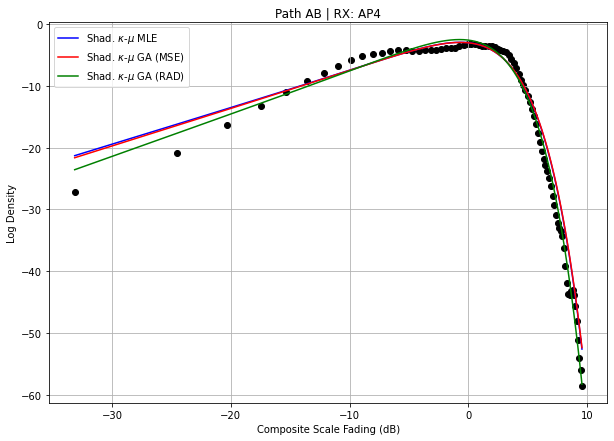

In [27]:
sku_t1_AB_ap4_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap4[0], mle_sku_t1_pathAB_ap4[1], mle_sku_t1_pathAB_ap4[2], mle_sku_t1_pathAB_ap4[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_AB_ap4_pdf,\
     estParameters_pathAB_ap4['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathAB_ap4['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [28]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap4 = computeAIC(data, n, K,\
                            mle_sku_t1_pathAB_ap4,\
                            estParameters_pathAB_ap4['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathAB_ap4['GA: Shad. KappaMu T1 - RAD'])

Path: AB
RX: AP4


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),27610.658936
1,MLE - Shad. KappaMu T1,27735.632924
2,GA - Shad. KappaMu T1 (Fitness = MSE),27740.402785


### AP 5

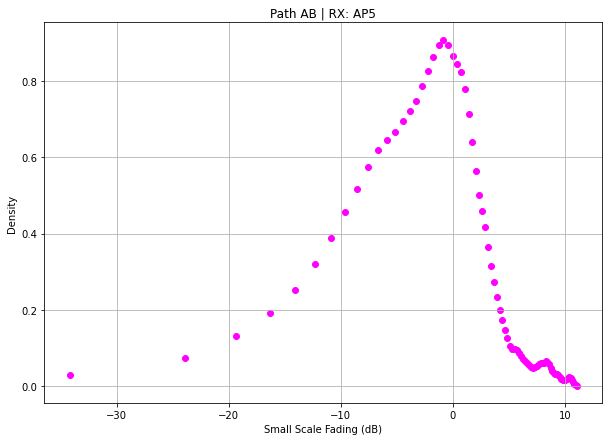

In [29]:
nAP = 'AP5'
estParameters_pathAB_ap5 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [30]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 656)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 121)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 4.10773777961731 seconds.

Best Fitness: 656.1233492418543
Best Gen: 17
Kappa: 3.5384346106412514
Mu: 0.8867696431935266
Omega: 1.0408590587627342
Md: 1.957527109761034
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 79.7374656200409 seconds.

Best Fitness: 121.22433439435181
Best Gen: 146
Kappa: 0.6966987589728638
Mu: 1.2477483237469393
Omega: 1.51836613203229
Md: 0.07036304319834051


#### Estimated Parameters

In [31]:
mle_sku_t1_pathAB_ap5 = [3.9094, 0.88723, 1.0457, 1.8299]

estParameters_pathAB_ap5['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathAB_ap5
estParameters_pathAB_ap5['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathAB_ap5['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathAB_ap5 = estParameters_pathAB_ap5.set_index(index)
estParameters_pathAB_ap5

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,3.90940,3.538435,0.696699
mu,0.88723,0.886770,1.247748
omega,1.04570,1.040859,1.518366
md,1.82990,1.957527,0.070363


#### Plots

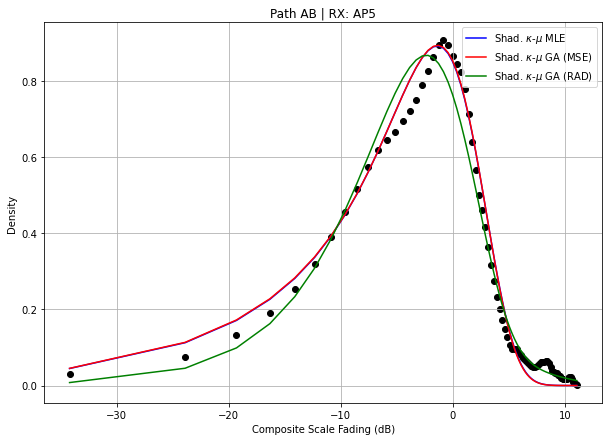

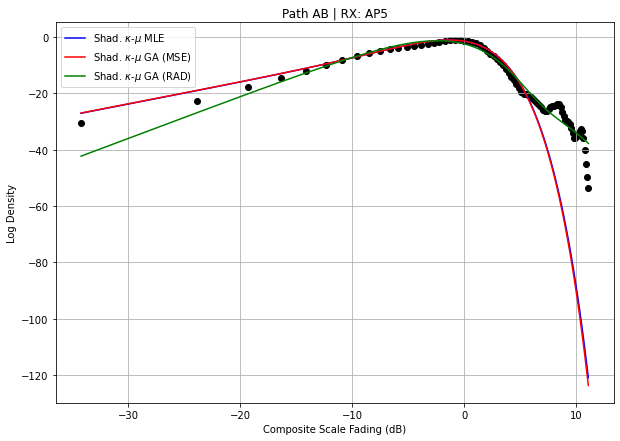

In [32]:
sku_t1_AB_ap5_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap5[0], mle_sku_t1_pathAB_ap5[1], mle_sku_t1_pathAB_ap5[2], mle_sku_t1_pathAB_ap5[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_AB_ap5_pdf,\
     estParameters_pathAB_ap5['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathAB_ap5['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [33]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap5 = computeAIC(data, n, K,\
                            mle_sku_t1_pathAB_ap5,\
                            estParameters_pathAB_ap5['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathAB_ap5['GA: Shad. KappaMu T1 - RAD'])

Path: AB
RX: AP5


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),27014.754158
1,MLE - Shad. KappaMu T1,31501.566814
2,GA - Shad. KappaMu T1 (Fitness = MSE),31731.398010


### AP 6

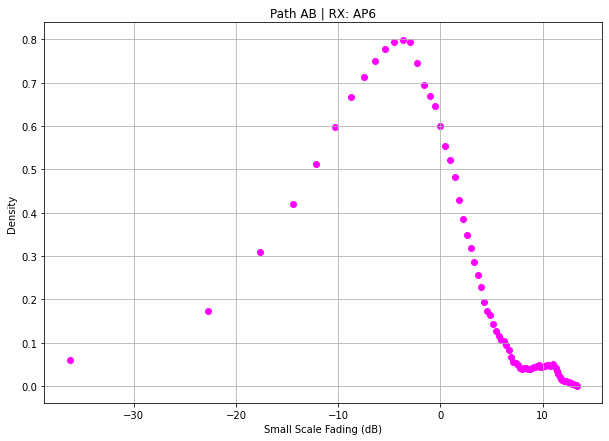

In [34]:
nAP = 'AP6'
estParameters_pathAB_ap6 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [35]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 8072)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 194)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 23.03510308265686 seconds.

Best Fitness: 8072.762854938256
Best Gen: 108
Kappa: 1.6527066424482746
Mu: 0.9324182866348348
Omega: 1.9454313227815998
Md: 0.09199549312901534
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 12.295244216918945 seconds.

Best Fitness: 194.0036631394911
Best Gen: 63
Kappa: 1.621830190666736
Mu: 0.9315598206212135
Omega: 1.8858275706129841
Md: 0.10211351389156306


#### Estimated Parameters

In [36]:
mle_sku_t1_pathAB_ap6 = [1.6065, 0.93539, 1.8788, 0.1]

estParameters_pathAB_ap6['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathAB_ap6
estParameters_pathAB_ap6['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathAB_ap6['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathAB_ap6 = estParameters_pathAB_ap6.set_index(index)
estParameters_pathAB_ap6

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,1.60650,1.652707,1.621830
mu,0.93539,0.932418,0.931560
omega,1.87880,1.945431,1.885828
md,0.10000,0.091995,0.102114


#### Plots

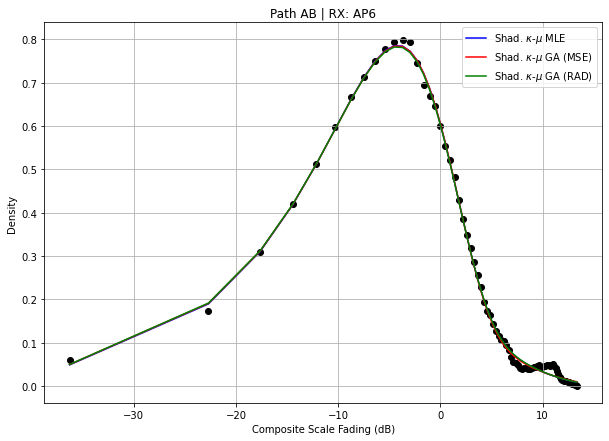

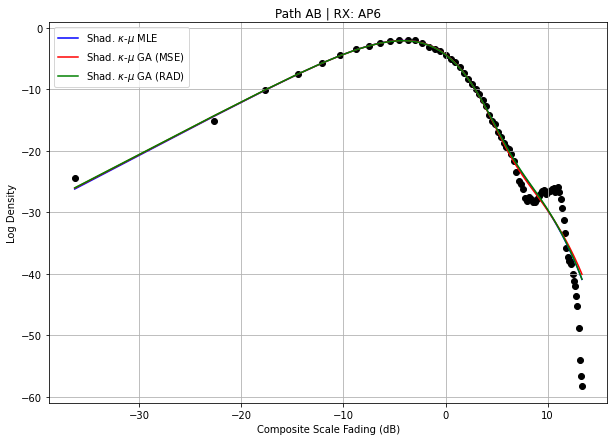

In [37]:
sku_t1_AB_ap6_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap6[0], mle_sku_t1_pathAB_ap6[1], mle_sku_t1_pathAB_ap6[2], mle_sku_t1_pathAB_ap6[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_AB_ap6_pdf,\
     estParameters_pathAB_ap6['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathAB_ap6['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [38]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap6 = computeAIC(data, n, K,\
                            mle_sku_t1_pathAB_ap6,\
                            estParameters_pathAB_ap6['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathAB_ap6['GA: Shad. KappaMu T1 - RAD'])

Path: AB
RX: AP6


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),30932.432161
1,MLE - Shad. KappaMu T1,30933.694435
2,GA - Shad. KappaMu T1 (Fitness = MSE),30993.893686


### AP 7

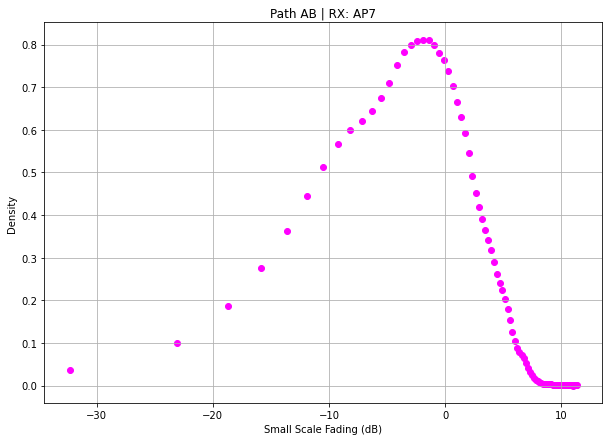

In [39]:
nAP = 'AP7'
estParameters_pathAB_ap7 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [40]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 4711)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 861)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 1.6402981281280518 seconds.

Best Fitness: 4719.409996637497
Best Gen: 6
Kappa: 4.723128107368967
Mu: 0.959356947068088
Omega: 1.140183349797488
Md: 1.0576989782298656
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP7

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 154.95923519134521 seconds.

Best Fitness: 861.1062874032817
Best Gen: 23
Kappa: 0.36181137114568845
Mu: 0.9959136345521692
Omega: 1.133757218671459
Md: 4.501593125541186


#### Estimated Parameters

In [41]:
mle_sku_t1_pathAB_ap7 = [3.5731, 0.96933, 1.141, 1.0611]

estParameters_pathAB_ap7['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathAB_ap7
estParameters_pathAB_ap7['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathAB_ap7['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathAB_ap7 = estParameters_pathAB_ap7.set_index(index)
estParameters_pathAB_ap7

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,3.57310,4.723128,0.361811
mu,0.96933,0.959357,0.995914
omega,1.14100,1.140183,1.133757
md,1.06110,1.057699,4.501593


#### Plots

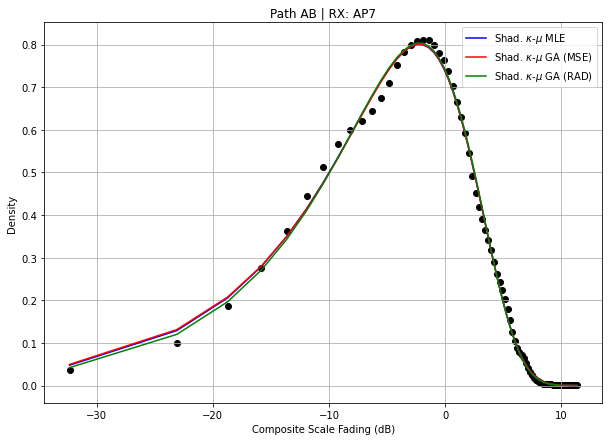

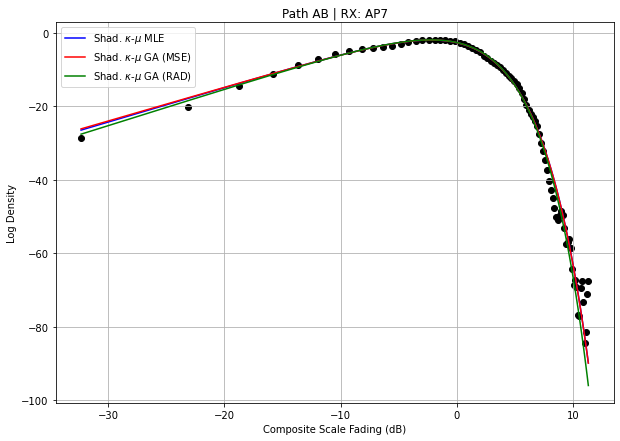

In [42]:
sku_t1_AB_ap7_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap7[0], mle_sku_t1_pathAB_ap7[1], mle_sku_t1_pathAB_ap7[2], mle_sku_t1_pathAB_ap7[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_AB_ap7_pdf,\
     estParameters_pathAB_ap7['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathAB_ap7['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [43]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap7 = computeAIC(data, n, K,\
                            mle_sku_t1_pathAB_ap7,\
                            estParameters_pathAB_ap7['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathAB_ap7['GA: Shad. KappaMu T1 - RAD'])

Path: AB
RX: AP7


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),24146.236029
1,MLE - Shad. KappaMu T1,24163.704485
2,GA - Shad. KappaMu T1 (Fitness = MSE),24167.720625


### AP 8

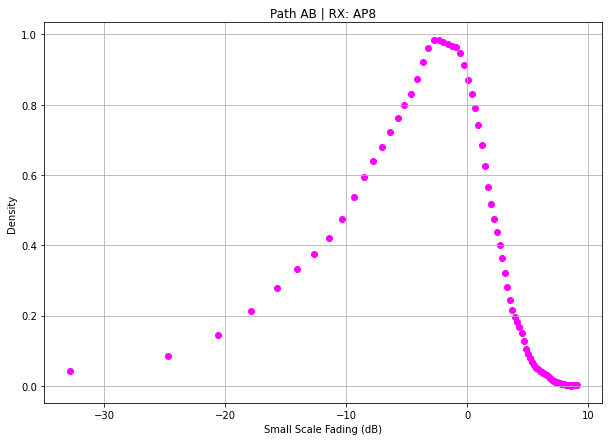

In [44]:
nAP = 'AP8'
estParameters_pathAB_ap8 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [45]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 4516)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 679)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 425.9112515449524 seconds.

Best Fitness: 4516.017817985115
Best Gen: 124
Kappa: 4.214724924158485
Mu: 0.8963553516421499
Omega: 0.8844133463468635
Md: 1.8413914435083139

#### Estimated Parameters

In [46]:
mle_sku_t1_pathAB_ap8 = [4.2103, 0.89571, 0.88403, 1.8455]

estParameters_pathAB_ap8['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathAB_ap8
estParameters_pathAB_ap8['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathAB_ap8['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathAB_ap8 = estParameters_pathAB_ap8.set_index(index)
estParameters_pathAB_ap8

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,4.21030,4.214725,8.803090
mu,0.89571,0.896355,0.946625
omega,0.88403,0.884413,0.913047
md,1.84550,1.841391,1.343086


#### Plots

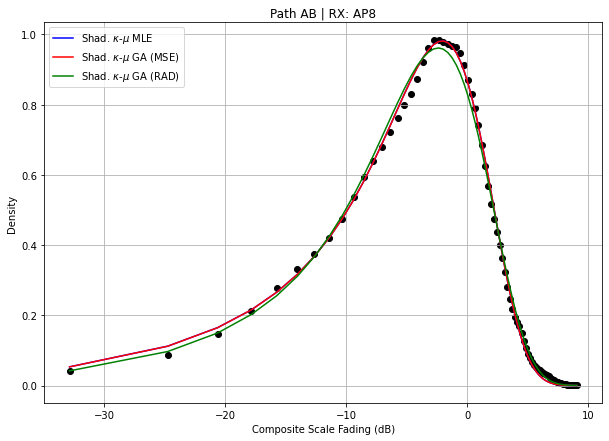

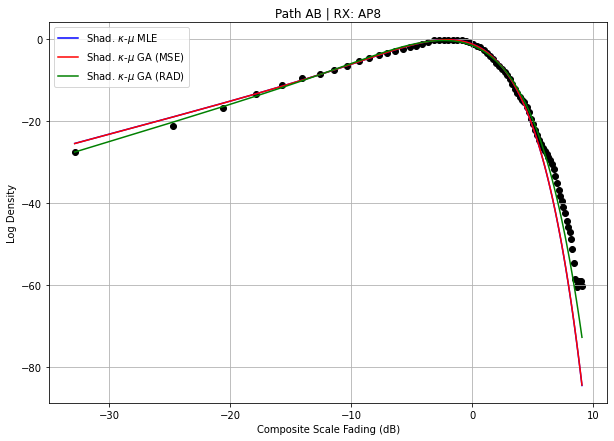

In [47]:
sku_t1_AB_ap8_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap8[0], mle_sku_t1_pathAB_ap8[1], mle_sku_t1_pathAB_ap8[2], mle_sku_t1_pathAB_ap8[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_AB_ap8_pdf,\
     estParameters_pathAB_ap8['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathAB_ap8['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [48]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap8 = computeAIC(data, n, K,\
                            mle_sku_t1_pathAB_ap8,\
                            estParameters_pathAB_ap8['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathAB_ap8['GA: Shad. KappaMu T1 - RAD'])

Path: AB
RX: AP8


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),18133.301973
1,GA - Shad. KappaMu T1 (Fitness = MSE),18234.640184
2,MLE - Shad. KappaMu T1,18236.317962


### AP 9

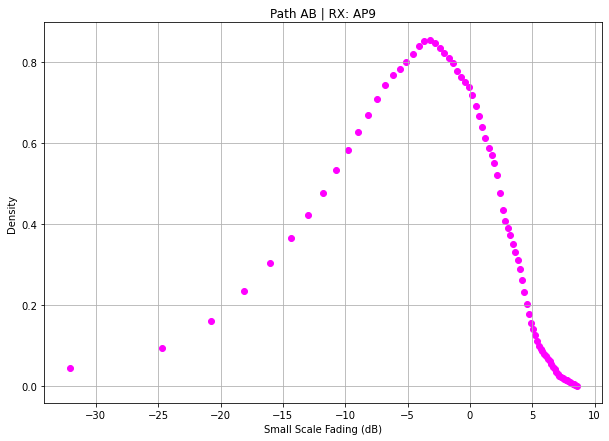

In [49]:
nAP = 'AP9'
estParameters_pathAB_ap9 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [50]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 8645)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 2472)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP9

Satisfactory Threshold reached!
Elapsed time is 1.547788143157959 seconds.

Best Fitness: 9497.574653617137
Best Gen: 6
Kappa: 5.695316090746051
Mu: 1.0235653786310916
Omega: 1.032553700364974
Md: 0.9745007347960083
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP9

Satisfactory Threshold reached!
Elapsed time is 1.2134172916412354 seconds.

Best Fitness: 2473.69806469593
Best Gen: 6
Kappa: 0.13603945281558166
Mu: 1.005216457847931
Omega: 1.0206393724277625
Md: 1.3510519456246683


#### Estimated Parameters

In [51]:
mle_sku_t1_pathAB_ap9 = [6.5017, 1, 1.0291, 0.97988]

estParameters_pathAB_ap9['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathAB_ap9
estParameters_pathAB_ap9['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathAB_ap9['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathAB_ap9 = estParameters_pathAB_ap9.set_index(index)
estParameters_pathAB_ap9

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,6.50170,5.695316,0.136039
mu,1.00000,1.023565,1.005216
omega,1.02910,1.032554,1.020639
md,0.97988,0.974501,1.351052


#### Plots

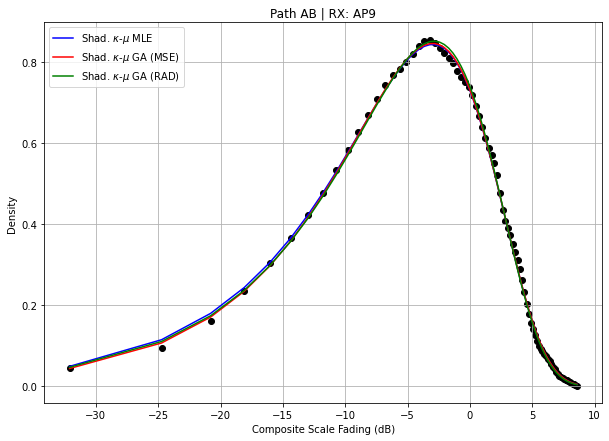

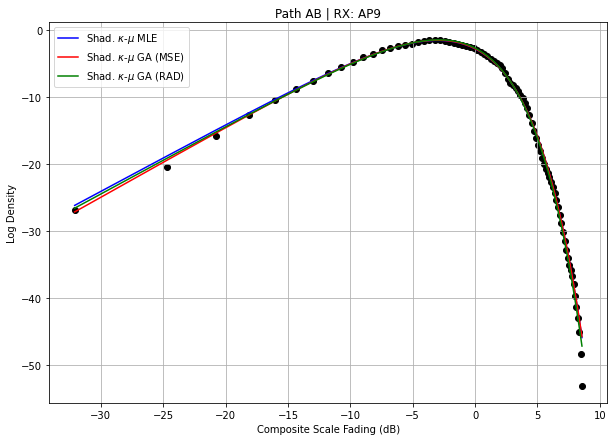

In [52]:
sku_t1_AB_ap9_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathAB_ap9[0], mle_sku_t1_pathAB_ap9[1], mle_sku_t1_pathAB_ap9[2], mle_sku_t1_pathAB_ap9[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_AB_ap9_pdf,\
     estParameters_pathAB_ap9['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathAB_ap9['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [53]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap9 = computeAIC(data, n, K,\
                            mle_sku_t1_pathAB_ap9,\
                            estParameters_pathAB_ap9['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathAB_ap9['GA: Shad. KappaMu T1 - RAD'])

Path: AB
RX: AP9


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),21665.359885
1,GA - Shad. KappaMu T1 (Fitness = MSE),21670.553331
2,MLE - Shad. KappaMu T1,21678.089124


## Shadowed $\kappa$-$\mu$ (type 1) - Path: BA

In [54]:
path = 'BA'

### AP 1

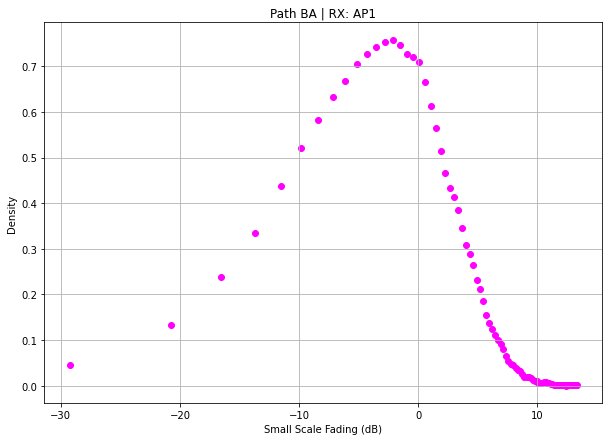

In [55]:
nAP = 'AP1'
estParameters_pathBA_ap1 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [56]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 14100)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 1464)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 19.500428199768066 seconds.

Best Fitness: 14103.521952440171
Best Gen: 92
Kappa: 0.7801439458059115
Mu: 1.0156863868947992
Omega: 1.3388594979714399
Md: 0.3733031940017979
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 28.696178674697876 seconds.

Best Fitness: 1464.2601352566417
Best Gen: 165
Kappa: 0.545713698083802
Mu: 1.019920656127393
Omega: 1.3542317631286236
Md: 0.23350819395988254


#### Estimated Parameters

In [57]:
mle_sku_t1_pathBA_ap1 = [0.74221, 1.0136, 1.3408, 0.35551]

estParameters_pathBA_ap1['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathBA_ap1
estParameters_pathBA_ap1['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathBA_ap1['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathBA_ap1 = estParameters_pathBA_ap1.set_index(index)
estParameters_pathBA_ap1

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,0.74221,0.780144,0.545714
mu,1.01360,1.015686,1.019921
omega,1.34080,1.338859,1.354232
md,0.35551,0.373303,0.233508


#### Plots

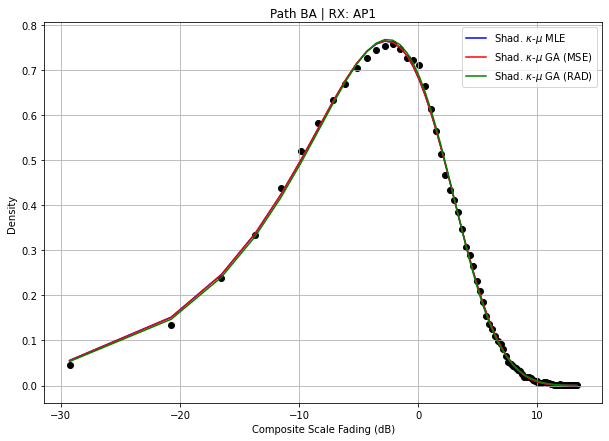

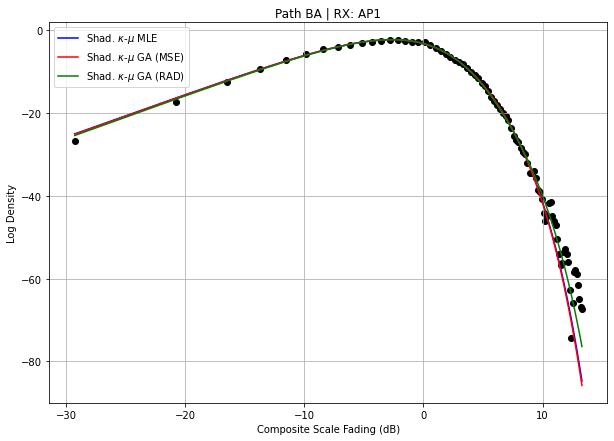

In [58]:
sku_t1_BA_ap1_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap1[0], mle_sku_t1_pathBA_ap1[1], mle_sku_t1_pathBA_ap1[2], mle_sku_t1_pathBA_ap1[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_BA_ap1_pdf,\
     estParameters_pathBA_ap1['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathBA_ap1['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [59]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap1 = computeAIC(data, n, K,\
                            mle_sku_t1_pathBA_ap1,\
                            estParameters_pathBA_ap1['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathBA_ap1['GA: Shad. KappaMu T1 - RAD'])

Path: BA
RX: AP1


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),32035.250903
1,MLE - Shad. KappaMu T1,32056.007614
2,GA - Shad. KappaMu T1 (Fitness = MSE),32058.828559


### AP 2

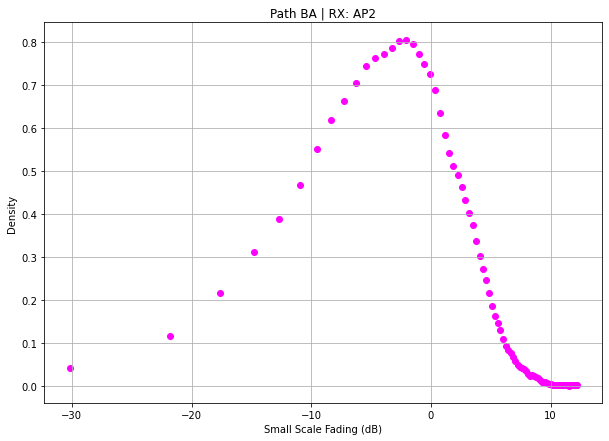

In [60]:
nAP = 'AP2'
estParameters_pathBA_ap2 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [61]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 13172)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 1453)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 89.3913094997406 seconds.

Best Fitness: 13172.281933079523
Best Gen: 19
Kappa: 1.3196294464901697
Mu: 1.0476440768662678
Omega: 1.1917004044554063
Md: 0.661022706291584
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP2

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 102.33354949951172 seconds.

Best Fitness: 1453.220057059284
Best Gen: 102
Kappa: 0.5374958046721865
Mu: 1.0421749331201338
Omega: 1.2095001766437476
Md: 0.3321198092850848


#### Estimated Parameters

In [62]:
mle_sku_t1_pathBA_ap2 = [1.3112, 1.0473, 1.1923, 0.65995]

estParameters_pathBA_ap2['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathBA_ap2
estParameters_pathBA_ap2['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathBA_ap2['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathBA_ap2 = estParameters_pathBA_ap2.set_index(index)
estParameters_pathBA_ap2

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,1.31120,1.319629,0.537496
mu,1.04730,1.047644,1.042175
omega,1.19230,1.191700,1.209500
md,0.65995,0.661023,0.332120


#### Plots

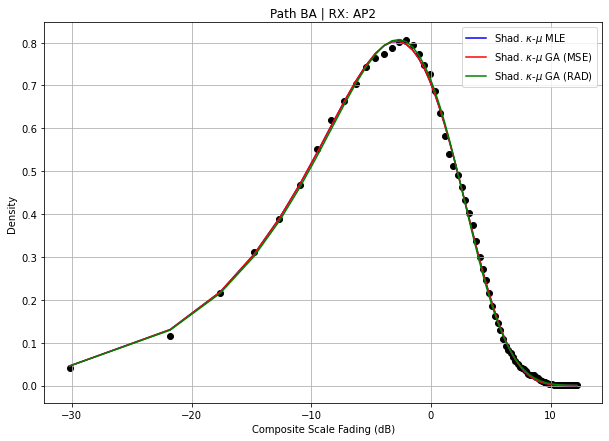

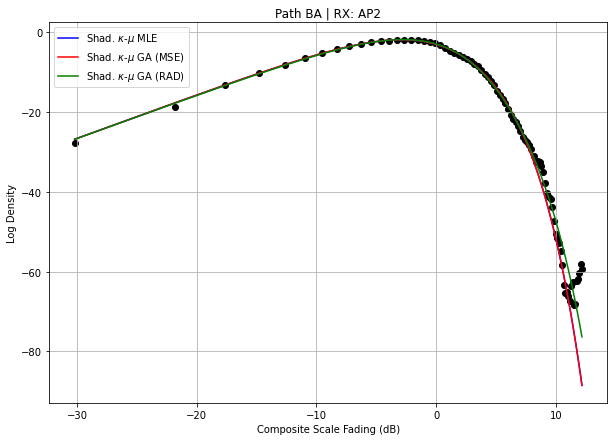

In [63]:
sku_t1_BA_ap2_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap2[0], mle_sku_t1_pathBA_ap2[1], mle_sku_t1_pathBA_ap2[2], mle_sku_t1_pathBA_ap2[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_BA_ap2_pdf,\
     estParameters_pathBA_ap2['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathBA_ap2['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [64]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap2 = computeAIC(data, n, K,\
                            mle_sku_t1_pathBA_ap2,\
                            estParameters_pathBA_ap2['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathBA_ap2['GA: Shad. KappaMu T1 - RAD'])

Path: BA
RX: AP2


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),28431.821669
1,MLE - Shad. KappaMu T1,28457.708908
2,GA - Shad. KappaMu T1 (Fitness = MSE),28457.865821


### AP 3

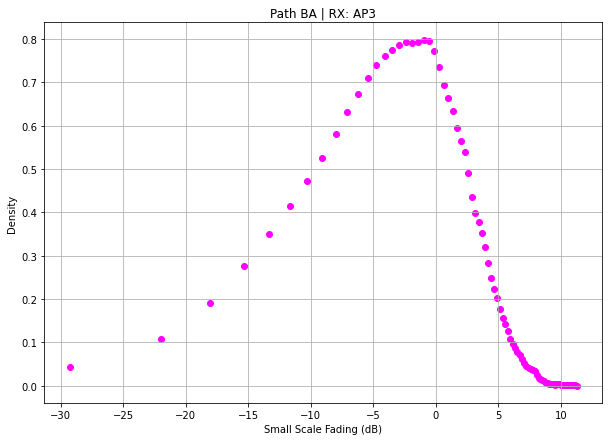

In [65]:
nAP = 'AP3'
estParameters_pathBA_ap3 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [66]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 14043)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 1850)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 43.5076687335968 seconds.

Best Fitness: 14047.77137056555
Best Gen: 194
Kappa: 4.669501397880464
Mu: 1.011042457884872
Omega: 1.1549212053033713
Md: 1.0538810901808775
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 21.90954899787903 seconds.

Best Fitness: 1860.7905838016372
Best Gen: 146
Kappa: 0.2645425904273089
Mu: 1.0579984668952152
Omega: 1.1849034195173707
Md: 0.2923579808188861


#### Estimated Parameters

In [67]:
mle_sku_t1_pathBA_ap3 = [4.1792, 1.0119, 1.1558, 1.0559]

estParameters_pathBA_ap3['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathBA_ap3
estParameters_pathBA_ap3['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathBA_ap3['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathBA_ap3 = estParameters_pathBA_ap3.set_index(index)
estParameters_pathBA_ap3

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,4.1792,4.669501,0.264543
mu,1.0119,1.011042,1.057998
omega,1.1558,1.154921,1.184903
md,1.0559,1.053881,0.292358


#### Plots

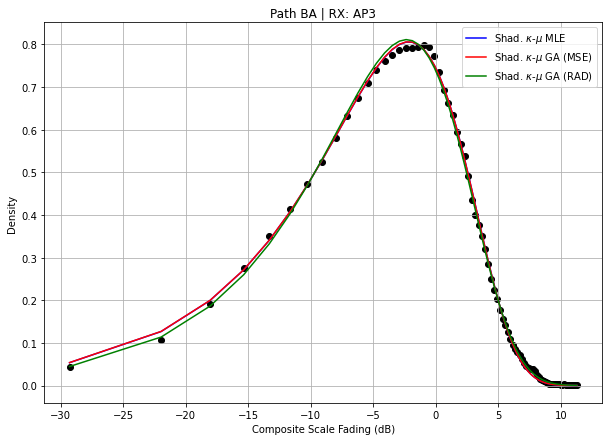

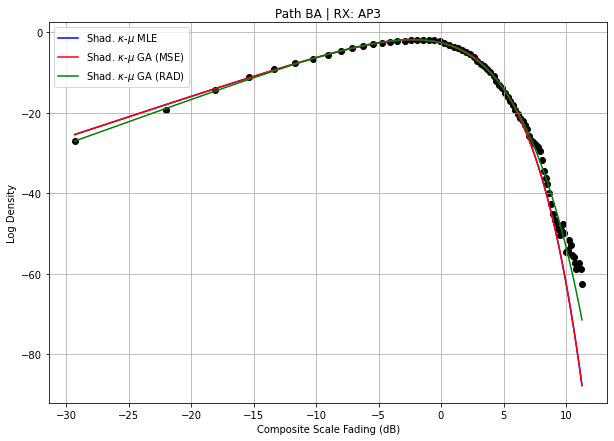

In [68]:
sku_t1_BA_ap3_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap3[0], mle_sku_t1_pathBA_ap3[1], mle_sku_t1_pathBA_ap3[2], mle_sku_t1_pathBA_ap3[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_BA_ap3_pdf,\
     estParameters_pathBA_ap3['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathBA_ap3['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [69]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap3 = computeAIC(data, n, K,\
                            mle_sku_t1_pathBA_ap3,\
                            estParameters_pathBA_ap3['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathBA_ap3['GA: Shad. KappaMu T1 - RAD'])

Path: BA
RX: AP3


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),26121.073290
1,MLE - Shad. KappaMu T1,26197.084896
2,GA - Shad. KappaMu T1 (Fitness = MSE),26197.674238


### AP 4

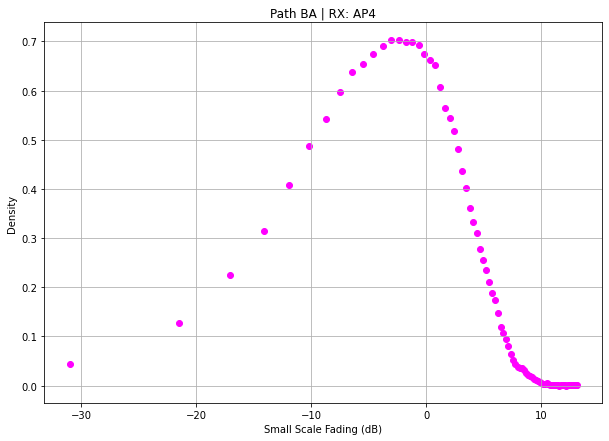

In [70]:
nAP = 'AP4'
estParameters_pathBA_ap4 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [72]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 26500)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 1230)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 79.29280924797058 seconds.

Best Fitness: 26519.763431479085
Best Gen: 91
Kappa: 18.07596014343452
Mu: 1.1033866364666824
Omega: 1.3687099247299155
Md: 0.885191671232334
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP4

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 139.85854244232178 seconds.

Best Fitness: 1231.0426850563933
Best Gen: 163
Kappa: 0.3551263142081705
Mu: 0.9659803382525256
Omega: 1.38720110967473
Md: 0.3185843775445932


#### Estimated Parameters

In [73]:
mle_sku_t1_pathBA_ap4 = [10, 1.0415, 1.3726, 0.87115]

estParameters_pathBA_ap4['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathBA_ap4
estParameters_pathBA_ap4['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathBA_ap4['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathBA_ap4 = estParameters_pathBA_ap4.set_index(index)
estParameters_pathBA_ap4

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,10.00000,18.075960,0.355126
mu,1.04150,1.103387,0.965980
omega,1.37260,1.368710,1.387201
md,0.87115,0.885192,0.318584


#### Plots

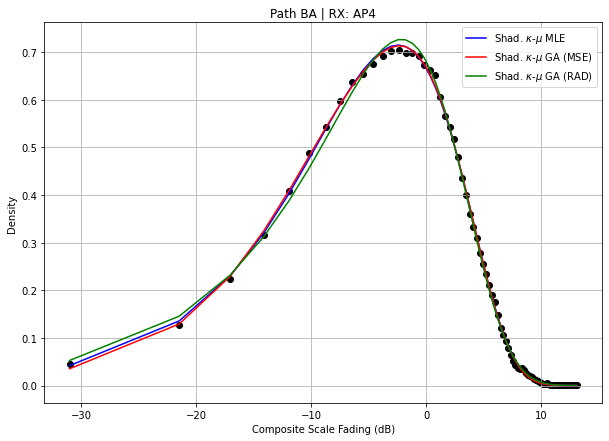

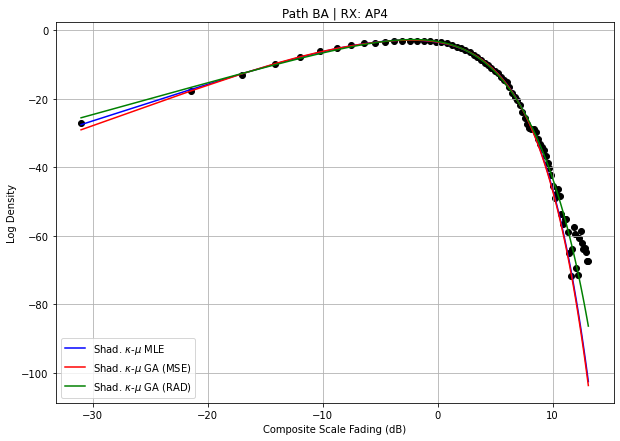

In [74]:
sku_t1_BA_ap4_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap4[0], mle_sku_t1_pathBA_ap4[1], mle_sku_t1_pathBA_ap4[2], mle_sku_t1_pathBA_ap4[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_BA_ap4_pdf,\
     estParameters_pathBA_ap4['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathBA_ap4['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [75]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap4 = computeAIC(data, n, K,\
                            mle_sku_t1_pathBA_ap4,\
                            estParameters_pathBA_ap4['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathBA_ap4['GA: Shad. KappaMu T1 - RAD'])

Path: BA
RX: AP4


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = MSE),31816.521753
1,GA - Shad. KappaMu T1 (Fitness = RAD),31817.991536
2,MLE - Shad. KappaMu T1,31823.019665


### AP 5

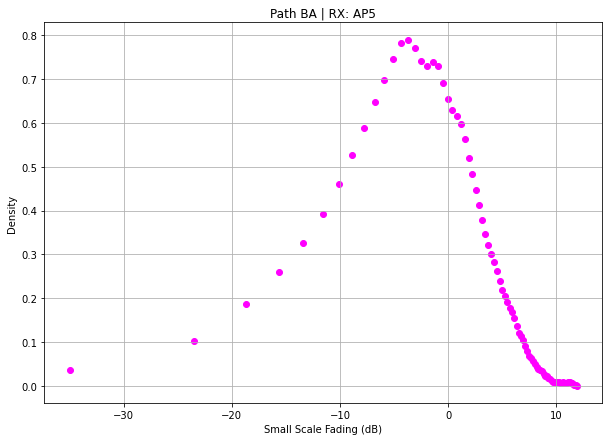

In [76]:
nAP = 'AP5'
estParameters_pathBA_ap5 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [77]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 9354)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 920)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 28.849369764328003 seconds.

Best Fitness: 9354.54776937385
Best Gen: 100
Kappa: 1.3514403255242071
Mu: 1.0777348211312534
Omega: 1.4149177487978604
Md: 0.42281005472950944
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP5

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 50.60972452163696 seconds.

Best Fitness: 920.2962199587785
Best Gen: 84
Kappa: 0.899070876377154
Mu: 1.0291670670978756
Omega: 1.4153664921583708
Md: 0.322862223118492


#### Estimated Parameters

In [78]:
mle_sku_t1_pathBA_ap5 = [1.351, 1.0774, 1.4152, 0.42291]

estParameters_pathBA_ap5['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathBA_ap5
estParameters_pathBA_ap5['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathBA_ap5['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathBA_ap5 = estParameters_pathBA_ap5.set_index(index)
estParameters_pathBA_ap5

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,1.35100,1.351440,0.899071
mu,1.07740,1.077735,1.029167
omega,1.41520,1.414918,1.415366
md,0.42291,0.422810,0.322862


#### Plots

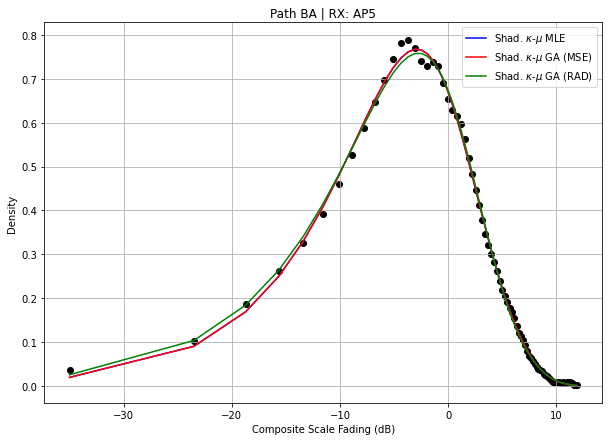

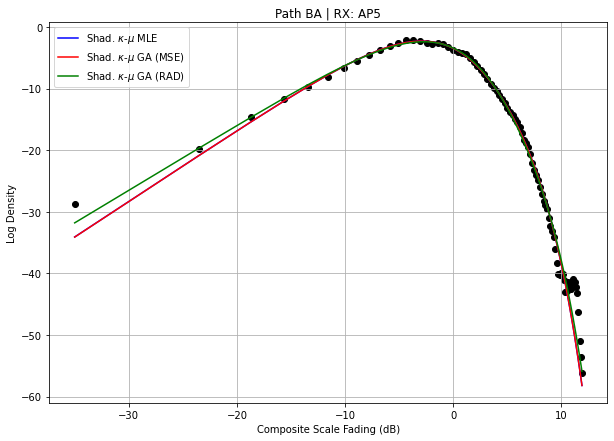

In [79]:
sku_t1_BA_ap5_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap5[0], mle_sku_t1_pathBA_ap5[1], mle_sku_t1_pathBA_ap5[2], mle_sku_t1_pathBA_ap5[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_BA_ap5_pdf,\
     estParameters_pathBA_ap5['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathBA_ap5['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [80]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap5 = computeAIC(data, n, K,\
                            mle_sku_t1_pathBA_ap5,\
                            estParameters_pathBA_ap5['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathBA_ap5['GA: Shad. KappaMu T1 - RAD'])

Path: BA
RX: AP5


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = MSE),31317.952276
1,MLE - Shad. KappaMu T1,31318.004686
2,GA - Shad. KappaMu T1 (Fitness = RAD),31327.020607


### AP 6

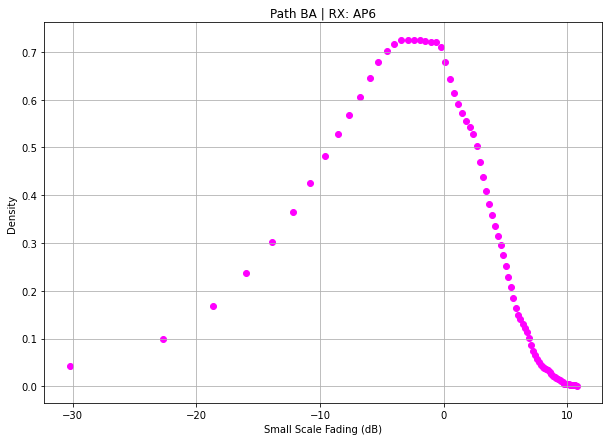

In [81]:
nAP = 'AP6'
estParameters_pathBA_ap6 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [82]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 22723)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 4400)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 42.08931565284729 seconds.

Best Fitness: 22744.353488762572
Best Gen: 153
Kappa: 3.663782307910331
Mu: 1.0496483524108495
Omega: 1.373814843332737
Md: 0.8375003642523733
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP6

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 93.25336289405823 seconds.

Best Fitness: 4403.3172229316315
Best Gen: 67
Kappa: 3.203967145266437
Mu: 1.0485185101947063
Omega: 1.377578694697031
Md: 0.8173329641082114


#### Estimated Parameters

In [83]:
mle_sku_t1_pathBA_ap6 = [3.9114, 1.0536, 1.3752, 0.8415]

estParameters_pathBA_ap6['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathBA_ap6
estParameters_pathBA_ap6['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathBA_ap6['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathBA_ap6 = estParameters_pathBA_ap6.set_index(index)
estParameters_pathBA_ap6

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,3.9114,3.663782,3.203967
mu,1.0536,1.049648,1.048519
omega,1.3752,1.373815,1.377579
md,0.8415,0.837500,0.817333


#### Plots

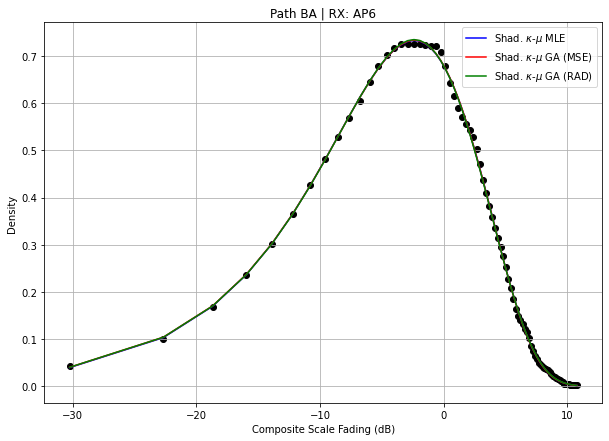

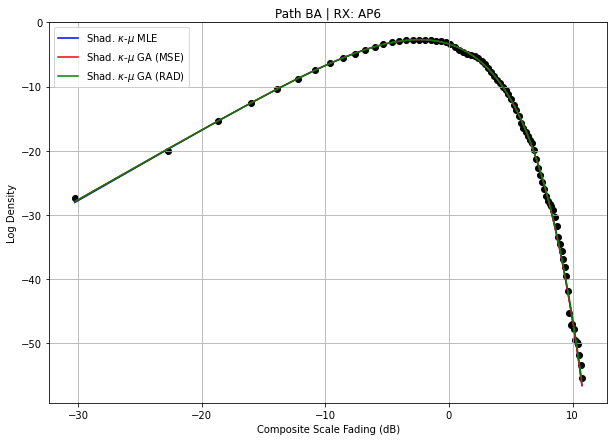

In [84]:
sku_t1_BA_ap6_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap6[0], mle_sku_t1_pathBA_ap6[1], mle_sku_t1_pathBA_ap6[2], mle_sku_t1_pathBA_ap6[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_BA_ap6_pdf,\
     estParameters_pathBA_ap6['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathBA_ap6['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [85]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap6 = computeAIC(data, n, K,\
                            mle_sku_t1_pathBA_ap6,\
                            estParameters_pathBA_ap6['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathBA_ap6['GA: Shad. KappaMu T1 - RAD'])

Path: BA
RX: AP6


,Methods,Akaike Information Criteria
0,MLE - Shad. KappaMu T1,30856.682597
1,GA - Shad. KappaMu T1 (Fitness = MSE),30857.464838
2,GA - Shad. KappaMu T1 (Fitness = RAD),30858.330949


### AP 7

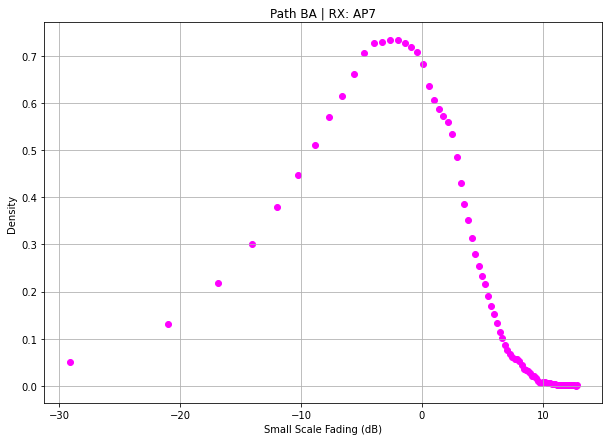

In [86]:
nAP = 'AP7'
estParameters_pathBA_ap7 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [87]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 6726)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 1910)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 2.327603816986084 seconds.

Best Fitness: 7544.097408393308
Best Gen: 6
Kappa: 1.0344268575041076
Mu: 0.982269544085894
Omega: 1.2956866242171723
Md: 0.8325291490276913
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP7

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 64.18428182601929 seconds.

Best Fitness: 1910.9415473058204
Best Gen: 132
Kappa: 0.4046578305965652
Mu: 1.0108957576553295
Omega: 1.394136903241226
Md: 0.2261939620881389


#### Estimated Parameters

In [88]:
mle_sku_t1_pathBA_ap7 = [0.27942, 0.9958, 1.4008, 0.12741]

estParameters_pathBA_ap7['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathBA_ap7
estParameters_pathBA_ap7['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathBA_ap7['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathBA_ap7 = estParameters_pathBA_ap7.set_index(index)
estParameters_pathBA_ap7

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,0.27942,1.034427,0.404658
mu,0.99580,0.982270,1.010896
omega,1.40080,1.295687,1.394137
md,0.12741,0.832529,0.226194


#### Plots

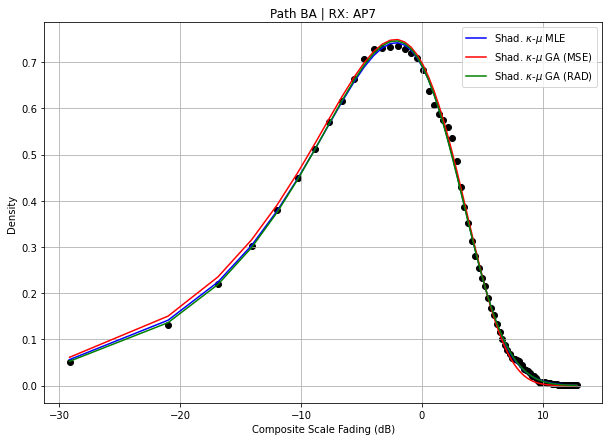

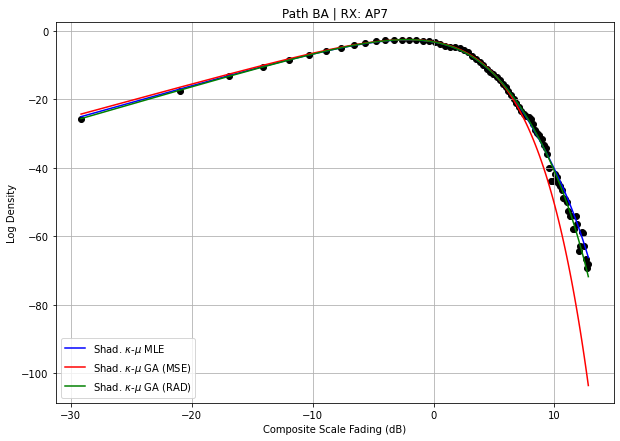

In [89]:
sku_t1_BA_ap7_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap7[0], mle_sku_t1_pathBA_ap7[1], mle_sku_t1_pathBA_ap7[2], mle_sku_t1_pathBA_ap7[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_BA_ap7_pdf,\
     estParameters_pathBA_ap7['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathBA_ap7['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [90]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap7 = computeAIC(data, n, K,\
                            mle_sku_t1_pathBA_ap7,\
                            estParameters_pathBA_ap7['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathBA_ap7['GA: Shad. KappaMu T1 - RAD'])

Path: BA
RX: AP7


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T1 (Fitness = RAD),32303.808076
1,MLE - Shad. KappaMu T1,32316.000710
2,GA - Shad. KappaMu T1 (Fitness = MSE),32550.326861


### AP 8

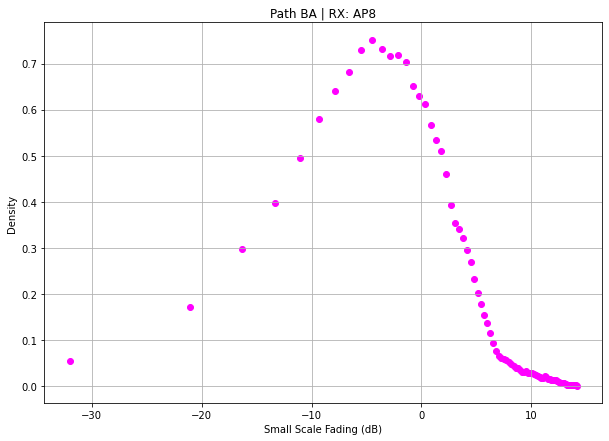

In [91]:
nAP = 'AP8'
estParameters_pathBA_ap8 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [92]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 7500)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 673)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 23.206955671310425 seconds.

Best Fitness: 7502.53939425793
Best Gen: 77
Kappa: 0.7831378598161675
Mu: 0.9266091470422492
Omega: 1.5620076848250544
Md: 0.1320315083426938
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 11.235976696014404 seconds.

Best Fitness: 673.0326309685972
Best Gen: 49
Kappa: 0.7578782308422457
Mu: 0.938633909566344
Omega: 1.6430701598722663
Md: 0.09286036145276261


#### Estimated Parameters

In [93]:
mle_sku_t1_pathBA_ap8 = [0.76344, 0.92246, 1.581, 0.11813]

estParameters_pathBA_ap8['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathBA_ap8
estParameters_pathBA_ap8['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathBA_ap8['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathBA_ap8 = estParameters_pathBA_ap8.set_index(index)
estParameters_pathBA_ap8

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,0.76344,0.783138,0.757878
mu,0.92246,0.926609,0.938634
omega,1.58100,1.562008,1.643070
md,0.11813,0.132032,0.092860


#### Plots

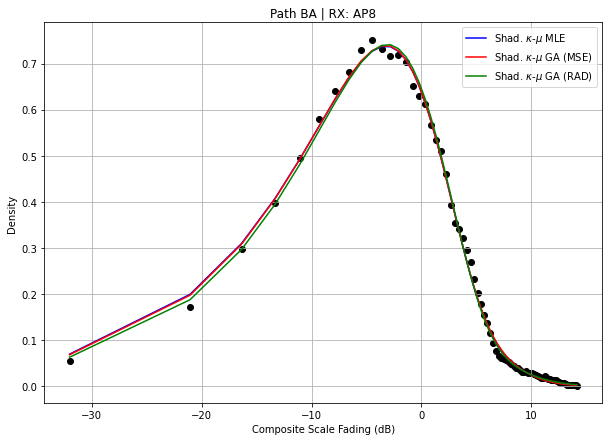

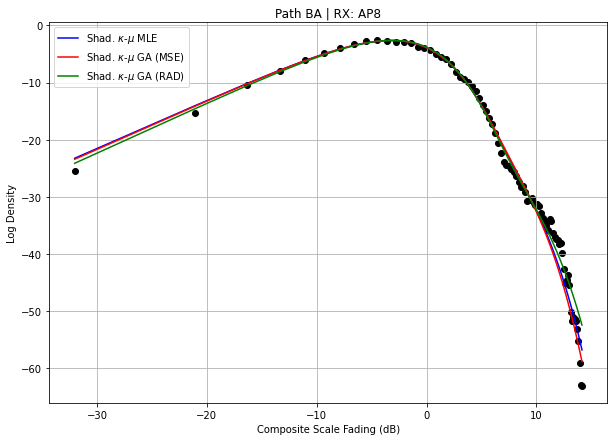

In [94]:
sku_t1_BA_ap8_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap8[0], mle_sku_t1_pathBA_ap8[1], mle_sku_t1_pathBA_ap8[2], mle_sku_t1_pathBA_ap8[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_BA_ap8_pdf,\
     estParameters_pathBA_ap8['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathBA_ap8['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [95]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap8 = computeAIC(data, n, K,\
                            mle_sku_t1_pathBA_ap8,\
                            estParameters_pathBA_ap8['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathBA_ap8['GA: Shad. KappaMu T1 - RAD'])

Path: BA
RX: AP8


,Methods,Akaike Information Criteria
0,MLE - Shad. KappaMu T1,34789.029802
1,GA - Shad. KappaMu T1 (Fitness = RAD),34791.568418
2,GA - Shad. KappaMu T1 (Fitness = MSE),34796.764582


### AP 9

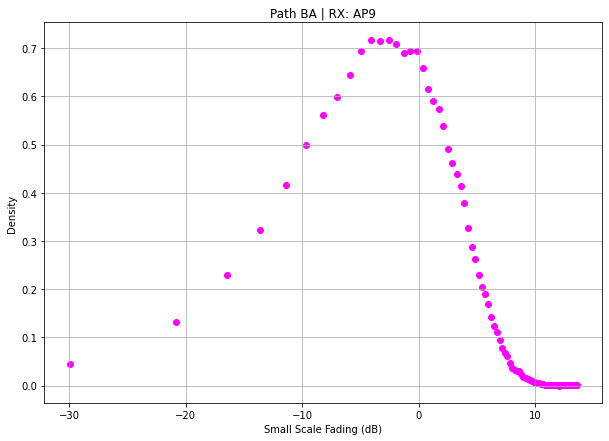

In [96]:
nAP = 'AP9'
estParameters_pathBA_ap9 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [97]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, omega_mse, md_mse = geneticAlgorithm_sku(Xdata, Ydata, 26204)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, omega_rad, md_rad = geneticAlgorithm_sku(Xdata, Ydata, 1668)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 80.13974452018738 seconds.

Best Fitness: 26206.845221069332
Best Gen: 69
Kappa: 8.846060481087239
Mu: 1.0827310640917205
Omega: 1.3742115488512985
Md: 0.8666976424636746
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP9

Satisfactory Threshold reached!
Elapsed time is 24.400739908218384 seconds.

Best Fitness: 1668.3521950284533
Best Gen: 91
Kappa: 4.293341078336271
Mu: 1.0465261845647098
Omega: 1.3827545779617372
Md: 0.8147974153122272


#### Estimated Parameters

In [98]:
mle_sku_t1_pathBA_ap9 = [9.0267, 1.086, 1.3744, 0.86735]

estParameters_pathBA_ap9['MLE - Shad. KappaMu T1'] = mle_sku_t1_pathBA_ap9
estParameters_pathBA_ap9['GA: Shad. KappaMu T1 - MSE'] = kappa_mse, mu_mse, omega_mse, md_mse
estParameters_pathBA_ap9['GA: Shad. KappaMu T1 - RAD'] = kappa_rad, mu_rad, omega_rad, md_rad

index = pd.Index(['kappa', 'mu', 'omega', 'md'])
estParameters_pathBA_ap9 = estParameters_pathBA_ap9.set_index(index)
estParameters_pathBA_ap9

,MLE - Shad. KappaMu T1,GA: Shad. KappaMu T1 - MSE,GA: Shad. KappaMu T1 - RAD
kappa,9.02670,8.846060,4.293341
mu,1.08600,1.082731,1.046526
omega,1.37440,1.374212,1.382755
md,0.86735,0.866698,0.814797


#### Plots

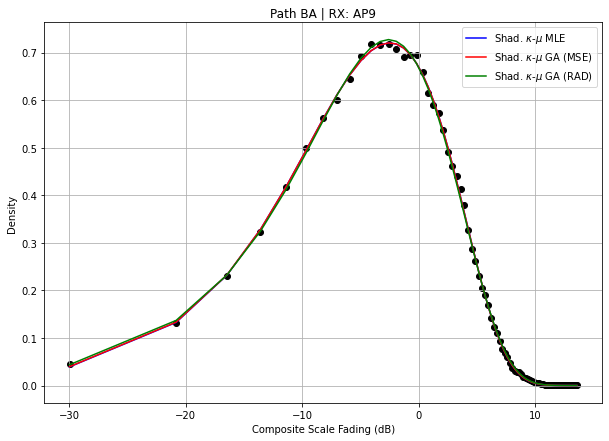

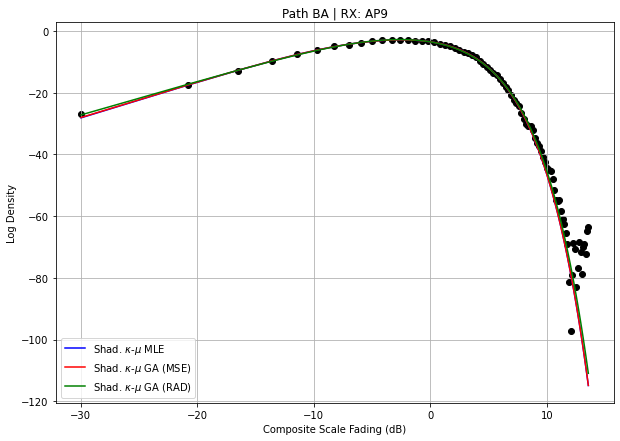

In [99]:
sku_t1_BA_ap9_pdf = shadowedKappaMuPDF(Xdata, mle_sku_t1_pathBA_ap9[0], mle_sku_t1_pathBA_ap9[1], mle_sku_t1_pathBA_ap9[2], mle_sku_t1_pathBA_ap9[3])

plotResults(Xdata,\
     Ydata,\
     sku_t1_BA_ap9_pdf,\
     estParameters_pathBA_ap9['GA: Shad. KappaMu T1 - MSE'],\
     estParameters_pathBA_ap9['GA: Shad. KappaMu T1 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [100]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap9 = computeAIC(data, n, K,\
                            mle_sku_t1_pathBA_ap9,\
                            estParameters_pathBA_ap9['GA: Shad. KappaMu T1 - MSE'],\
                            estParameters_pathBA_ap9['GA: Shad. KappaMu T1 - RAD'])

Path: BA
RX: AP9


,Methods,Akaike Information Criteria
0,MLE - Shad. KappaMu T1,31323.445877
1,GA - Shad. KappaMu T1 (Fitness = MSE),31323.999429
2,GA - Shad. KappaMu T1 (Fitness = RAD),31324.897597
